In [94]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import math

%matplotlib inline


In [22]:
mu, sigma = 0, 0.1 # mean and standard deviationr.sort()
s = np.random.normal(mu, sigma, 1000)

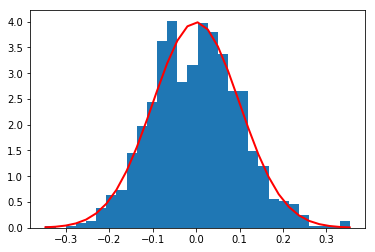

In [25]:
count, bins, ignored = plt.hist(s, 30, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.show()

In [28]:
s.sort()


In [34]:
HRM(s, len(s))

1

In [193]:
beta = 0.5

# Example of [1,2,2,3,4]
def HRM(v, N):
    
    print("")
    print("Starting with,", v)
    
    # Step 2
    if N == 1 or N == 2:
        return v.mean()
    
    # Step 3
    w = beta*(v[-1]-v[0]) # Pass 1: 1.5
    print("w", w)
    

    # Step 4
    I=[]
    for j in range(0, N-1): # j = 1 to N-1, paper is 1 based index
        I.append((v[j], v[j]+w) )
    I = np.array(I)
    print('I',I) # Pass 1: [(1, 2.5), (2, 3.5), (2, 3.5), (3, 4.5)]
    cnt = np.array([((rng[0] <= v) & (v <= rng[1])).sum() for rng in I])
    print('cnt', cnt) # Pass 1: [3, 3, 3, 2]
    N_prime = max(cnt)
    print('N\'', N_prime) # Pass 1: 0
    
    # Step 5
    if (cnt == N_prime).sum() == 1:
        print("doing step 5")
        J = I[np.where(cnt == N_prime)[0][0]]
        print('J', J)

        v = v[np.logical_and(v>=J[0], v<=J[1])]
        print('v', v)
        return HRM(v, len(v))
        
        
    # Step 6
    print("doing step 6")
    J = I[cnt == N_prime]
    print('J', J)


In [194]:
HRM(np.array([1,1,1,1,2,3,3,3,3,3,3,3]), 10)



Starting with, [1 1 1 1 2 3 3 3 3 3 3 3]
w 1.0
I [[ 1.  2.]
 [ 1.  2.]
 [ 1.  2.]
 [ 1.  2.]
 [ 2.  3.]
 [ 3.  4.]
 [ 3.  4.]
 [ 3.  4.]
 [ 3.  4.]]
cnt [5 5 5 5 8 7 7 7 7]
N' 8
doing step 5
J [ 2.  3.]
v [2 3 3 3 3 3 3 3]

Starting with, [2 3 3 3 3 3 3 3]
w 0.5
I [[ 2.   2.5]
 [ 3.   3.5]
 [ 3.   3.5]
 [ 3.   3.5]
 [ 3.   3.5]
 [ 3.   3.5]
 [ 3.   3.5]]
cnt [1 7 7 7 7 7 7]
N' 7
doing step 6
J [[ 3.   3.5]
 [ 3.   3.5]
 [ 3.   3.5]
 [ 3.   3.5]
 [ 3.   3.5]
 [ 3.   3.5]]


In [130]:
v = np.array([1,2,2,3,4])
test = (1, 2.5)

(v == 2).sum()

2